# Datasets

A dataset is a list of (input, target) pairs that can be further split into training and testing lists.

Let's make an example network to use as demonstration. This network will compute whether the number of 1's in a set of 5 bits is odd.

In [1]:
import conx as cx

net = cx.Network("Odd Network")
net.add(cx.Layer("input", 5))
net.add(cx.Layer("hidden", 10, activation="relu"))
net.add(cx.Layer("output", 1, activation="sigmoid"))
net.connect()
net.compile(error="mse", optimizer="adam")
net.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 5)                 0         
_________________________________________________________________
hidden (Dense)               (None, 10)                60        
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


ConX, version 3.7.5


## As a list of (input, target) pairs

The most straightforward method of adding input, target vectors to train on is to use a list of (input, target) pairs. First we define a function that takes a number and returns the bitwise representation of it:

In [2]:
def num2bin(i, bits=5):
    """
    Take a number and turn it into a list of bits (most significant first).
    """
    return [int(s) for s in (("0" * bits) + bin(i)[2:])[-bits:]]

In [3]:
num2bin(23)

[1, 0, 1, 1, 1]

Now we make a list of (input, target) pairs:

In [4]:
patterns = []

for i in range(2 ** 5):
    inputs = num2bin(i)
    targets = [int(sum(inputs) % 2 == 1.0)]
    patterns.append((inputs, targets))

Pair set 5 looks like:

In [5]:
patterns[5]

([0, 0, 1, 0, 1], [0])

We set the network to use this dataset:

In [6]:
patterns

[([0, 0, 0, 0, 0], [0]),
 ([0, 0, 0, 0, 1], [1]),
 ([0, 0, 0, 1, 0], [1]),
 ([0, 0, 0, 1, 1], [0]),
 ([0, 0, 1, 0, 0], [1]),
 ([0, 0, 1, 0, 1], [0]),
 ([0, 0, 1, 1, 0], [0]),
 ([0, 0, 1, 1, 1], [1]),
 ([0, 1, 0, 0, 0], [1]),
 ([0, 1, 0, 0, 1], [0]),
 ([0, 1, 0, 1, 0], [0]),
 ([0, 1, 0, 1, 1], [1]),
 ([0, 1, 1, 0, 0], [0]),
 ([0, 1, 1, 0, 1], [1]),
 ([0, 1, 1, 1, 0], [1]),
 ([0, 1, 1, 1, 1], [0]),
 ([1, 0, 0, 0, 0], [1]),
 ([1, 0, 0, 0, 1], [0]),
 ([1, 0, 0, 1, 0], [0]),
 ([1, 0, 0, 1, 1], [1]),
 ([1, 0, 1, 0, 0], [0]),
 ([1, 0, 1, 0, 1], [1]),
 ([1, 0, 1, 1, 0], [1]),
 ([1, 0, 1, 1, 1], [0]),
 ([1, 1, 0, 0, 0], [0]),
 ([1, 1, 0, 0, 1], [1]),
 ([1, 1, 0, 1, 0], [1]),
 ([1, 1, 0, 1, 1], [0]),
 ([1, 1, 1, 0, 0], [1]),
 ([1, 1, 1, 0, 1], [0]),
 ([1, 1, 1, 1, 0], [0]),
 ([1, 1, 1, 1, 1], [1])]

In [7]:
net.dataset.load(patterns)

In [8]:
net.dataset.info()

**Dataset**: Dataset for Odd Network

**Information**:
   * name    : None
   * length  : 32

**Input Summary**:
   * shape  : (5,)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (1,)
   * range  : (0.0, 1.0)



## Dataset.add()

You can use the default `dataset` and add one pattern at a time. Consider the task of training a network to determine if the number of inputs is even (0) or odd (1). We could add inputs one at a time:

In [9]:
net.dataset.clear()

In [10]:
net.dataset.append([0, 0, 0, 0, 1], [1])
net.dataset.append([0, 0, 0, 1, 1], [0])
net.dataset.append([0, 0, 1, 0, 0], [1])

In [11]:
net.dataset.clear()

In [12]:
for i in range(2 ** 5):
    inputs = num2bin(i)
    targets = [int(sum(inputs) % 2 == 1.0)]
    net.dataset.append(inputs, targets)

In [13]:
net.dataset.info()

**Dataset**: Dataset for Odd Network

**Information**:
   * name    : None
   * length  : 32

**Input Summary**:
   * shape  : (5,)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (1,)
   * range  : (0.0, 1.0)



In [14]:
net.dataset.inputs[13]

[0.0, 1.0, 1.0, 0.0, 1.0]

In [15]:
net.dataset.targets[13]

[1.0]

In [16]:
net.reset()

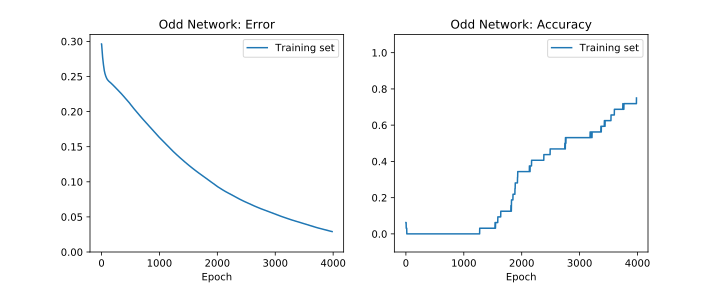

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 3982 |   0.02909 |   0.75000 


In [17]:
net.train(epochs=5000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)

In [19]:
net.test(tolerance=.2, show=True)

Testing validation dataset with tolerance 0.2...
# | inputs | targets | outputs | result
---------------------------------------
0 | [[0.00, 0.00, 0.00, 0.00, 0.00]] | [[0.00]] | [0.01] | correct
1 | [[0.00, 0.00, 0.00, 0.00, 1.00]] | [[1.00]] | [0.83] | correct
2 | [[0.00, 0.00, 0.00, 1.00, 0.00]] | [[1.00]] | [0.83] | correct
3 | [[0.00, 0.00, 0.00, 1.00, 1.00]] | [[0.00]] | [0.04] | correct
4 | [[0.00, 0.00, 1.00, 0.00, 0.00]] | [[1.00]] | [0.82] | correct
5 | [[0.00, 0.00, 1.00, 0.00, 1.00]] | [[0.00]] | [0.09] | correct
6 | [[0.00, 0.00, 1.00, 1.00, 0.00]] | [[0.00]] | [0.27] | X
7 | [[0.00, 0.00, 1.00, 1.00, 1.00]] | [[1.00]] | [0.96] | correct
8 | [[0.00, 1.00, 0.00, 0.00, 0.00]] | [[1.00]] | [0.93] | correct
9 | [[0.00, 1.00, 0.00, 0.00, 1.00]] | [[0.00]] | [0.33] | X
10 | [[0.00, 1.00, 0.00, 1.00, 0.00]] | [[0.00]] | [0.01] | correct
11 | [[0.00, 1.00, 0.00, 1.00, 1.00]] | [[1.00]] | [0.84] | correct
12 | [[0.00, 1.00, 1.00, 0.00, 0.00]] | [[0.00]] | [0.04] | correct
13 | [[0.

## Dataset inputs and targets

Inputs and targets in the dataset are represented in the same format as given (as lists, or lists of lists). These formats are automattically converted into an internal format.

In [20]:
ds = net.dataset

In [21]:
ds.inputs[17]

[1.0, 0.0, 0.0, 0.0, 1.0]

To see/access the internal format, use the underscore before inputs or targets. This is a numpy array. ConX is designed so that you need not have to use numpy for most network operations.

In [22]:
ds._inputs[0][17]

array([1., 0., 0., 0., 1.], dtype=float32)

## Built-in datasets

In [23]:
cx.Dataset.datasets()

['cifar10',
 'cifar100',
 'cmu_faces_full_size',
 'cmu_faces_half_size',
 'cmu_faces_quarter_size',
 'colors',
 'figure_ground_a',
 'fingers',
 'gridfonts',
 'mnist',
 'vmnist']

In [24]:
ds = cx.Dataset.get('mnist')
ds

**Dataset**: MNIST


Original source: http://yann.lecun.com/exdb/mnist/

The MNIST dataset contains 70,000 images of handwritten digits (zero
to nine) that have been size-normalized and centered in a square grid
of pixels.  Each image is a 28 × 28 × 1 array of floating-point numbers
representing grayscale intensities ranging from 0 (black) to 1
(white).  The target data consists of one-hot binary vectors of size
10, corresponding to the digit classification categories zero through
nine.  Some example MNIST images are shown below:

![MNIST Images](https://github.com/Calysto/conx/raw/master/data/mnist_images.png)

**Information**:
   * name    : MNIST
   * length  : 70000

**Input Summary**:
   * shape  : (28, 28, 1)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (10,)
   * range  : (0.0, 1.0)



In [25]:
ds = cx.Dataset.get('cifar10')
ds

**Dataset**: CIFAR-10


Original source: https://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10
classes, with 6000 images per class.

The classes are completely mutually exclusive. There is no overlap
between automobiles and trucks. "Automobile" includes sedans, SUVs,
things of that sort. "Truck" includes only big trucks. Neither
includes pickup trucks.

**Information**:
   * name    : CIFAR-10
   * length  : 60000

**Input Summary**:
   * shape  : (32, 32, 3)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (10,)
   * range  : (0.0, 1.0)



In [26]:
ds = cx.Dataset.get("gridfonts")
ds

**Dataset**: Gridfonts


This dataset originates from Douglas Hofstadter's research
group:

http://goosie.cogsci.indiana.edu/pub/gridfonts.data

![Gridfont Grid](https://github.com/Calysto/conx/raw/master/data/grid.png)

These data have been processed to make them neural
network friendly:

https://github.com/Calysto/conx/blob/master/data/gridfonts.py

The dataset is composed of letters on a 25 row x 9 column
grid. The inputs and targets are identical, and the labels
contain a string identifying the letter.

You can read a thesis using part of this dataset here:
https://repository.brynmawr.edu/compsci_pubs/78/

**Information**:
   * name    : Gridfonts
   * length  : 7462

**Input Summary**:
   * shape  : (25, 9)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (25, 9)
   * range  : (0.0, 1.0)



In [27]:
ds = cx.Dataset.get('cifar100')
ds

**Dataset**: CIFAR-100


Original source: https://www.cs.toronto.edu/~kriz/cifar.html

This dataset is just like the CIFAR-10, except it has 100 classes
containing 600 images each. The 100 classes in the CIFAR-100 are grouped
into 20 superclasses. Each image comes with a "fine" label (the class
to which it belongs) and a "coarse" label (the superclass to which it
belongs).  Here is the list of classes in the CIFAR-100:

Superclass                     | Classes
-------------------------------|-----------------------------------------------------
aquatic mammals	               | beaver, dolphin, otter, seal, whale
fish                           | aquarium fish, flatfish, ray, shark, trout
flowers	                       | orchids, poppies, roses, sunflowers, tulips
food containers                | bottles, bowls, cans, cups, plates
fruit and vegetables           | apples, mushrooms, oranges, pears, sweet peppers
household electrical devices   | clock, computer keyboard, lamp, telephone, television
household furniture            | bed, chair, couch, table, wardrobe
insects	                       | bee, beetle, butterfly, caterpillar, cockroach
large carnivores               | bear, leopard, lion, tiger, wolf
large man-made outdoor things  | bridge, castle, house, road, skyscraper
large natural outdoor scenes   | cloud, forest, mountain, plain, sea
large omnivores and herbivores | camel, cattle, chimpanzee, elephant, kangaroo
medium-sized mammals           | fox, porcupine, possum, raccoon, skunk
non-insect invertebrates       | crab, lobster, snail, spider, worm
people	                       | baby, boy, girl, man, woman
reptiles                       | crocodile, dinosaur, lizard, snake, turtle
small mammals                  | hamster, mouse, rabbit, shrew, squirrel
trees                          | maple, oak, palm, pine, willow
vehicles 1                     | bicycle, bus, motorcycle, pickup truck, train
vehicles 2                     | lawn-mower, rocket, streetcar, tank, tractor


**Information**:
   * name    : CIFAR-100
   * length  : 60000

**Input Summary**:
   * shape  : (32, 32, 3)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (100,)
   * range  : (0.0, 1.0)



## Dataset Methods

Class methods:

* Dataset.datasets() - get a list of all known datasets
* Dataset.get(name) - get a named dataset and return a ConX Dataset
* summary() - display a summary of the dataset

Instance methods:

**General operations**:

* datasets() - get a list of all known datasets
* clear() - clear the current dataset of all data
* copy(dataset) - get a copy of the dataset

**Constructing datasets**:

* get(name) - get a named dataset; overwrites previous dataset if any
* load_direct(inputs=None, targets=None, labels=None) - loads internal dataset format directly
* load(pairs=None, inputs=None, targets=None, labels=None) - load by fields
* add(inputs, targets) - add a single [inputs] / [targets] pair
* add_random(count, frange=(-1, 1)) - adds count random patterns to dataset; requires a network
* add_by_function(width, frange, ifunction, tfunction) - adds to inputs with ifunction, and to targets with tfunction

* slice(start=None, stop=None) - select the data between start and stop; clears split
* shuffle() - shuffle the dataset; shuffles entire set; clears split
* split(split=None) - split the dataset into train/test sets. split=0.1 saves 10% for testing. split amount can be fraction or integer
* chop(amount) - chop this amount from end; amount can be fraction, or integer

* set_targets_from_inputs(f=None, input_bank=0, target_bank=0) -
* set_inputs_from_targets(f=None, input_bank=0, target_bank=0) -
* set_targets_from_labels(num_classes=None, bank_index=0) -
* rescale_inputs(bank_index, old_range, new_range, new_dtype) -


### Dataset Examples

Dataset.split() will divide the dataset between training and testing sets. You can provide split an integer (to divide at a specific point), or a floating-point value, to divide by a percentage.

In [28]:
ds.split(20)

In [29]:
ds.split(.5)

In [30]:
ds.slice(10)

In [31]:
ds.shuffle()

In [32]:
ds.chop(5)

In [33]:
ds.summary()

_________________________________________________________________
CIFAR-100:
Patterns    Shape                 Range                         
inputs      (32, 32, 3)           (0.0, 1.0)                    
targets     (100,)                (0.0, 1.0)                    
Total patterns: 5
   Training patterns: 5
   Testing patterns: 0
_________________________________________________________________


### Additional operations


In [34]:
ds.set_targets_from_inputs()

In [35]:
ds.set_inputs_from_targets()

In [36]:
ds.inputs.shape

[(32, 32, 3)]

In [37]:
ds.inputs.reshape(0, (32 * 32 * 3,))

In [38]:
ds.inputs.shape

[(3072,)]

## Data Vector Operations

Each dataset has the following virtual fields:

* inputs - a complete list of all input vectors
* targets - a complete list of all target vectors
* labels - a complete list of all labels (if any)

* train_inputs - a list of all input vectors for training
* train_targets - a list of all target vectors for training
* train_labels - a list of all labels (if any) for training

* test_inputs - a list of all input vectors for testing
* test_targets - a list of all target vectors for testing
* test_labels - a list of all labels (if any) for testing

You may perform standard list-based operations on these virtual arrays, including:

* len(FIELD) - length
* FIELD[num] - indexing
* FIELD[START:END] - slice
* FIELD[num, num, num, ...] - selection by index

In addition, each field has the following methods:

* get_shape(bank_index=None) - get the shape of a bank
* filter_indices(function) - get a list of indices whose FIELD matches filter(FIELD[index])
* filter(function) - get a list of FIELD[i] where FIELD[i] matches filter(FIELD[i])
* reshape(bank_index, new_shape=None) - change the shape of a bank

## Dataset direct manipulation

You can also set the internal format directly, given that it is in the correct format:

* use list of columns for multi-bank inputs or targets
* use np.array(vectors) for single-bank inputs or targets

In [39]:
import numpy as np

inputs = []
targets = []

for i in range(2 ** 5):
    v = num2bin(i)
    inputs.append(v)
    targets.append([int(sum(v) % 2 == 1.0)])

net = cx.Network("Even-Odd", 5, 2, 2, 1)
net.compile(error="mse", optimizer="adam")
net.dataset.load_direct([np.array(inputs)], [np.array(targets)])

In [40]:
net.test(tolerance=.2, show=True)

Testing validation dataset with tolerance 0.2...
# | inputs | targets | outputs | result
---------------------------------------
0 | [[0.00, 0.00, 0.00, 0.00, 0.00]] | [[0.00]] | [0.00] | correct
1 | [[0.00, 0.00, 0.00, 0.00, 1.00]] | [[1.00]] | [0.42] | X
2 | [[0.00, 0.00, 0.00, 1.00, 0.00]] | [[1.00]] | [-0.31] | X
3 | [[0.00, 0.00, 0.00, 1.00, 1.00]] | [[0.00]] | [0.11] | correct
4 | [[0.00, 0.00, 1.00, 0.00, 0.00]] | [[1.00]] | [-0.07] | X
5 | [[0.00, 0.00, 1.00, 0.00, 1.00]] | [[0.00]] | [0.35] | X
6 | [[0.00, 0.00, 1.00, 1.00, 0.00]] | [[0.00]] | [-0.37] | X
7 | [[0.00, 0.00, 1.00, 1.00, 1.00]] | [[1.00]] | [0.05] | X
8 | [[0.00, 1.00, 0.00, 0.00, 0.00]] | [[1.00]] | [0.60] | X
9 | [[0.00, 1.00, 0.00, 0.00, 1.00]] | [[0.00]] | [1.02] | X
10 | [[0.00, 1.00, 0.00, 1.00, 0.00]] | [[0.00]] | [0.30] | X
11 | [[0.00, 1.00, 0.00, 1.00, 1.00]] | [[1.00]] | [0.71] | X
12 | [[0.00, 1.00, 1.00, 0.00, 0.00]] | [[0.00]] | [0.54] | X
13 | [[0.00, 1.00, 1.00, 0.00, 1.00]] | [[1.00]] | [0.95] | 